# Import the necessary packages

In [1]:
import matplotlib.pyplot as plt
import csv
import numpy as np
import re

# Imread the csv information

In [2]:
def read_csv_file(file_path):
    servoing_informations = []
    counter = 0
    with open(file_path, 'r') as csv_file:
        csv_reader = csv.reader(csv_file)
        next(csv_reader)  # skip header

        for row in csv_reader:
            if counter == 0:
                goal_informations = row
            else:
                servoing_informations.append(row)
            counter += 1
    return goal_informations, servoing_informations

In [3]:
goal_informations, servoing_informations= read_csv_file("/home/svenportable/FuE/F-E-Project_Part_2/servoing_csv/keypoints_selected_720_5mm_2 config_geringer_regelfehler_1500Iterationen.csv")

# Get the time values

In [4]:
interference_neural_networks = [] # only nn
time_for_keypoint_extraction = [] # keypoint extraction function
time_for_servoing_loop = [] # hole servoing loop
time_for_picture = [] # time for taking a picture

for i in range(len(servoing_informations)):
    time_for_servoing_loop.append(float(servoing_informations[i][2]))
    interference_neural_networks.append(float(servoing_informations[i][3]))
    time_for_keypoint_extraction.append(float(servoing_informations[i][4]))
    time_for_picture.append(float(servoing_informations[i][6]))


Mean Interference Neural Network:  0.024256799467021986
Mean Time for Interference + Keypoint Extraction:  0.028576378414390407
Mean Time for Servoing Loop:  0.1333950319786809
Mean Time for Taking a Picture:  0.06531534710193204


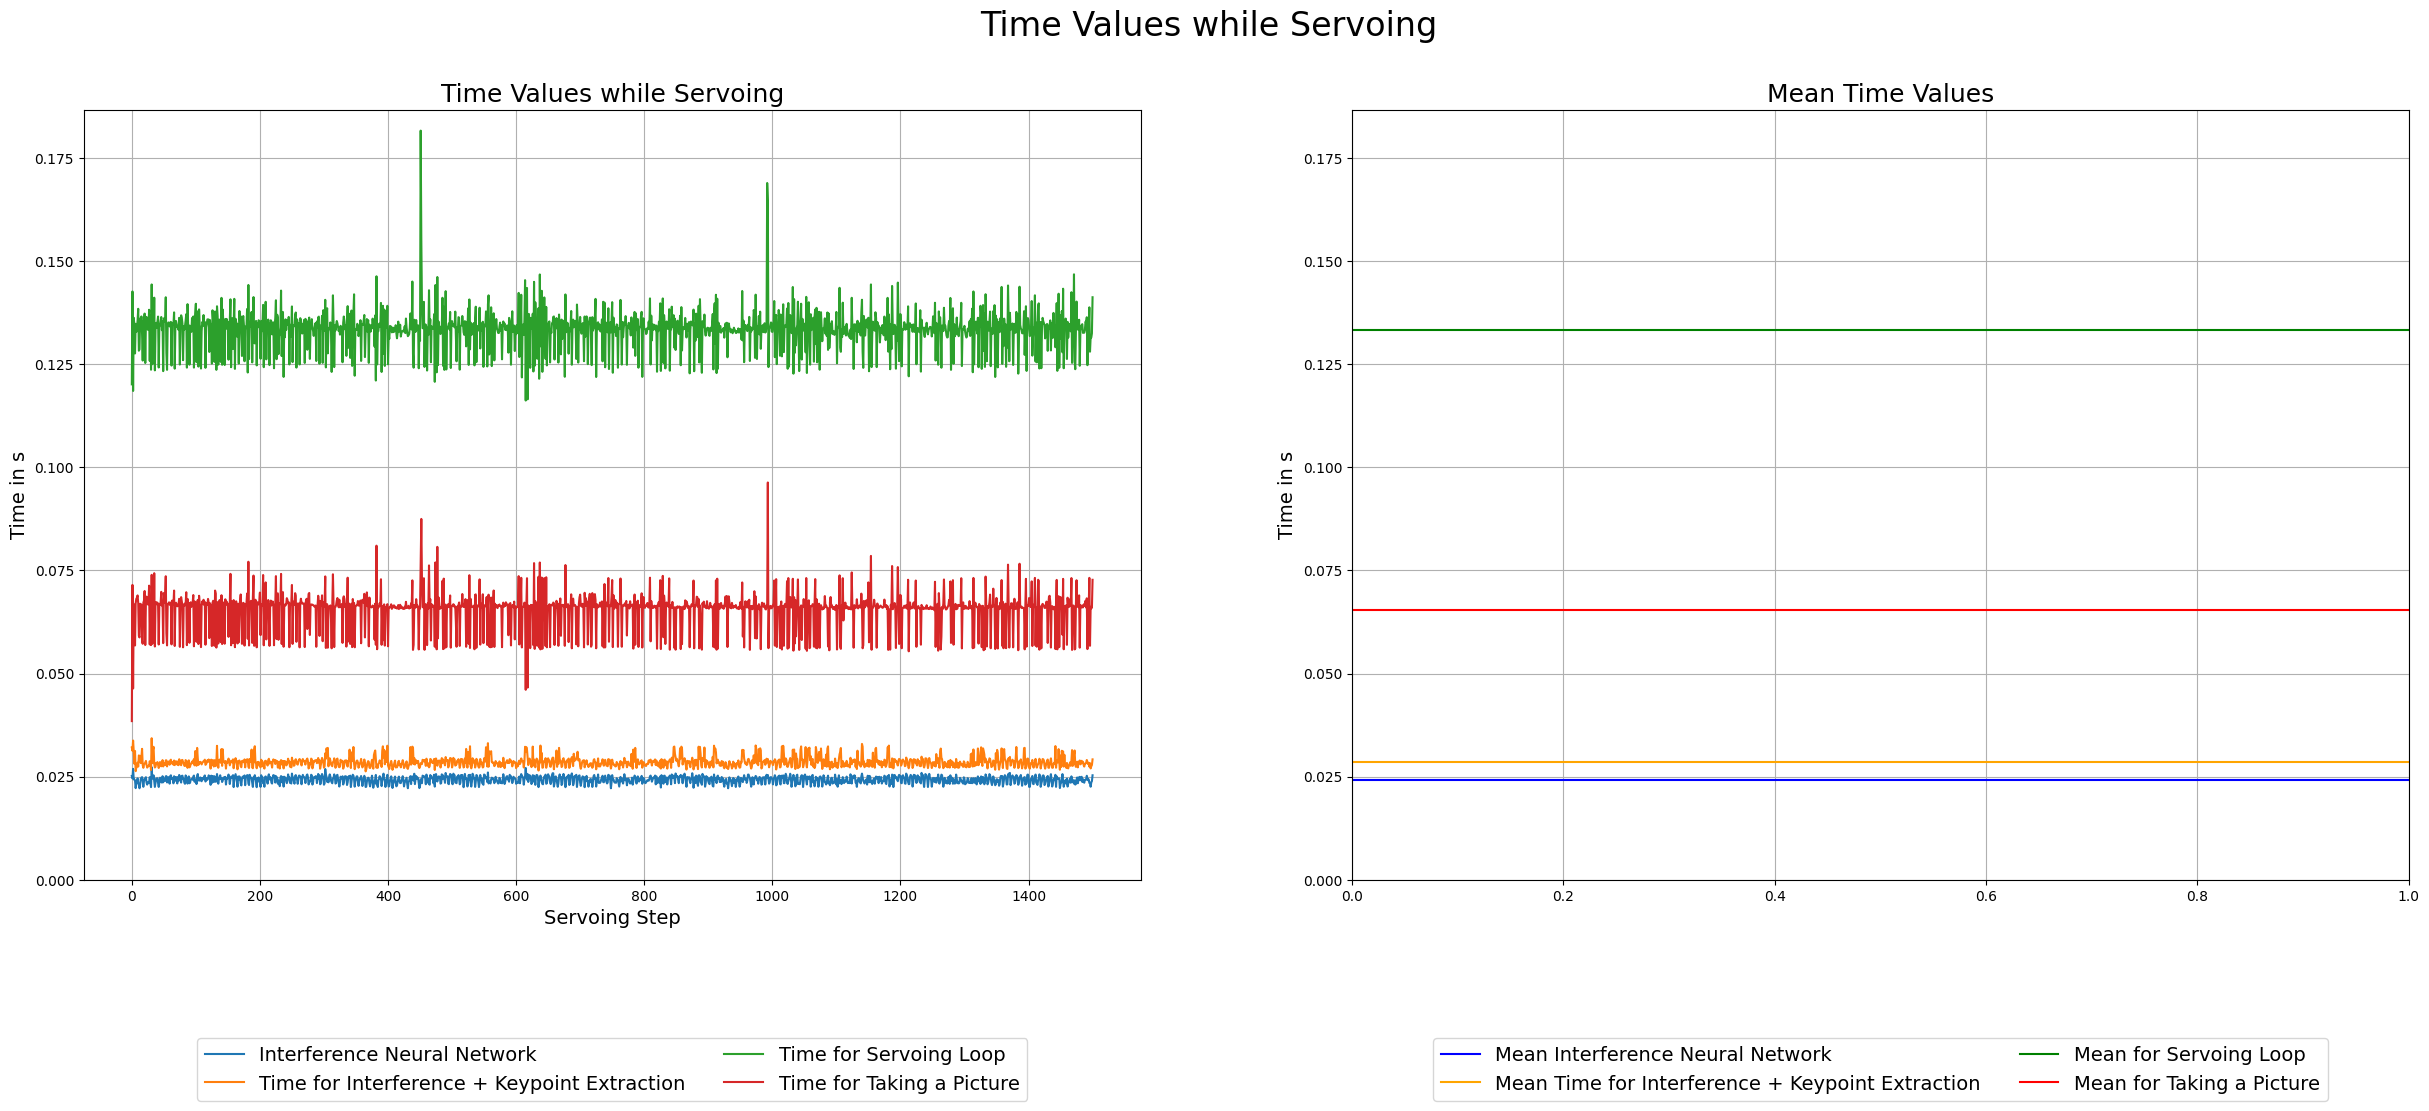

In [5]:
# Generate random data for mean values (example)
mean_interference_neural_networks = np.array(interference_neural_networks).mean()
mean_time_for_keypoint_extraction = np.array(time_for_keypoint_extraction).mean()
mean_time_for_servoing_loop = np.array(time_for_servoing_loop).mean()
mean_time_for_picture = np.array(time_for_picture).mean()

print("Mean Interference Neural Network: ", mean_interference_neural_networks)
print("Mean Time for Interference + Keypoint Extraction: ", mean_time_for_keypoint_extraction)
print("Mean Time for Servoing Loop: ", mean_time_for_servoing_loop)
print("Mean Time for Taking a Picture: ", mean_time_for_picture)


# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10))

# Plot the upper code on the left subplot (ax1)
ax1.plot(interference_neural_networks, label="Interference Neural Network")
ax1.plot(time_for_keypoint_extraction, label="Time for Interference + Keypoint Extraction")
ax1.plot(time_for_servoing_loop, label="Time for Servoing Loop")
ax1.plot(time_for_picture, label="Time for Taking a Picture")
ax1.set_xlabel("Servoing Step", fontsize=14)
ax1.set_ylabel("Time in s", fontsize=14)
legend = ax1.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=2, fontsize=14)
ax1.set_ylim(0, max(mean_interference_neural_networks, mean_time_for_keypoint_extraction, mean_time_for_servoing_loop)*1.4)
ax1.title.set_text('Time Values while Servoing')
ax1.title.set_fontsize(18)
ax1.grid()

# Plot the mean values on the right subplot (ax2)
ax2.axhline(y=mean_interference_neural_networks, color="blue",label="Mean Interference Neural Network")
ax2.axhline(y=mean_time_for_keypoint_extraction, color="orange",label="Mean Time for Interference + Keypoint Extraction")
ax2.axhline(y=mean_time_for_servoing_loop, color="green",label="Mean for Servoing Loop")
ax2.axhline(y=mean_time_for_picture, color="red",label="Mean for Taking a Picture")
ax2.set_ylabel("Time in s", fontsize=14)
legend = ax2.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=2, fontsize=14)
ax2.set_ylim(0, max(mean_interference_neural_networks, mean_time_for_keypoint_extraction, mean_time_for_servoing_loop)*1.4)
ax2.title.set_text('Mean Time Values')
ax2.title.set_fontsize(18)
ax2.grid()

# Display the plot
plt.suptitle('Time Values while Servoing', fontsize=24)
plt.show()

# Get the Progression of the Keypoints while Servoing

In [6]:
goal_featurepoints = goal_informations[0]
goal_featurepoints = eval(goal_featurepoints)

In [7]:
# make a list with 64 lists in it
pixel_error = []
for i in range(len(goal_featurepoints)):
    pixel_error.append([])

In [8]:
for row in servoing_informations:
    featurepoints = row[0]
    featurepoints = eval(featurepoints)

    for i in range(len(featurepoints)):
        pixel_error_x = goal_featurepoints[i][0]-featurepoints[i][0]
        pixel_error_y = goal_featurepoints[i][1]-featurepoints[i][1]
        pixel_error[i].append([pixel_error_x, pixel_error_y])

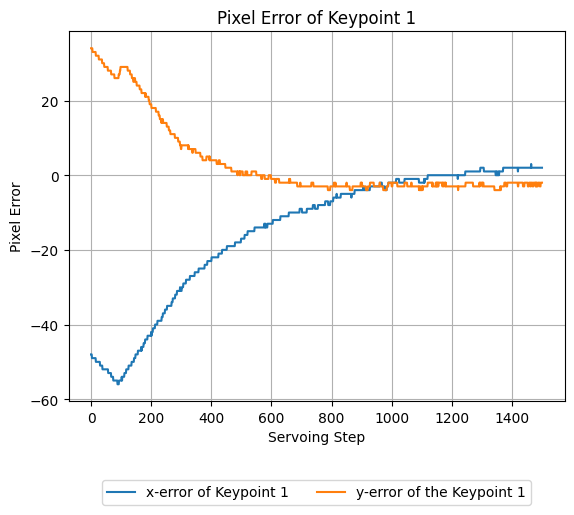

In [9]:
keypoint_number = 1 # starts with 0

plt.plot(pixel_error[keypoint_number])
plt.xlabel('Servoing Step')
plt.ylabel('Pixel Error')
plt.title('Pixel Error of Keypoint ' + str(keypoint_number))
plt.legend(['x-error of Keypoint '+str(keypoint_number), 'y-error of the Keypoint '+str(keypoint_number)], loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=2)
plt.grid()
plt.show()



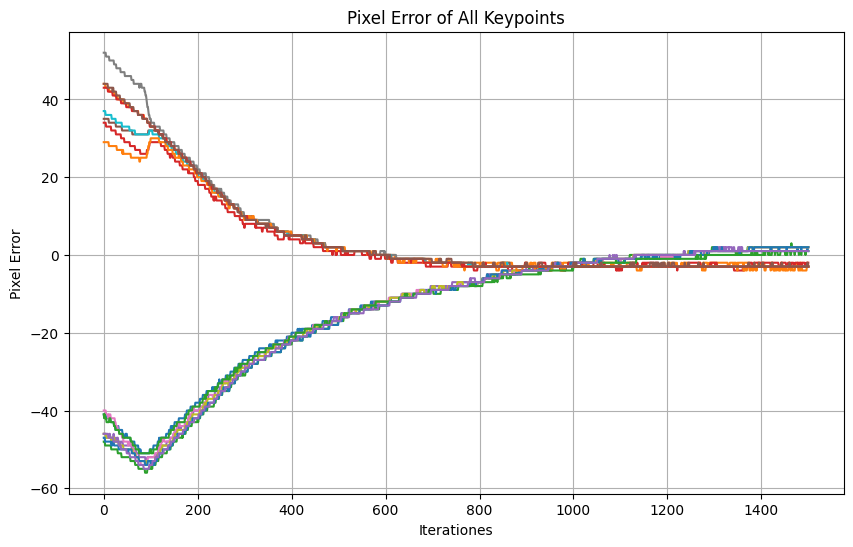

In [10]:
num_keypoints = len(goal_featurepoints)

plt.figure(figsize=(10, 6))  # Optional: Set the size of the figure

for keypoint_number in range(num_keypoints):  # Assuming num_keypoints is the total number of keypoints
    plt.plot(pixel_error[keypoint_number])

plt.xlabel('Iterationes')
plt.ylabel('Pixel Error')
plt.title('Pixel Error of All Keypoints')

# Generate labels for the legend
legend_labels = ['Keypoint {}'.format(keypoint_number) for keypoint_number in range(num_keypoints)]

#plt.legend(legend_labels, loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=2)
plt.grid()
plt.show()


# Plot the Velocity of the Endeffector while Servoing

In [11]:
velocity = [] # hole servoing loop

for i in range(len(servoing_informations)):
    string = servoing_informations[i][5]
    clean_string = re.sub(r'[^\d.eE+-]+', ' ', string)
    values = re.findall(r"[-+]?\d+(?:\.\d+)?(?:[eE][-+]?\d+)?", clean_string)
    float_values = [float(value) for value in values]
    velocity.append(float_values)

velocity = list(zip(*velocity))

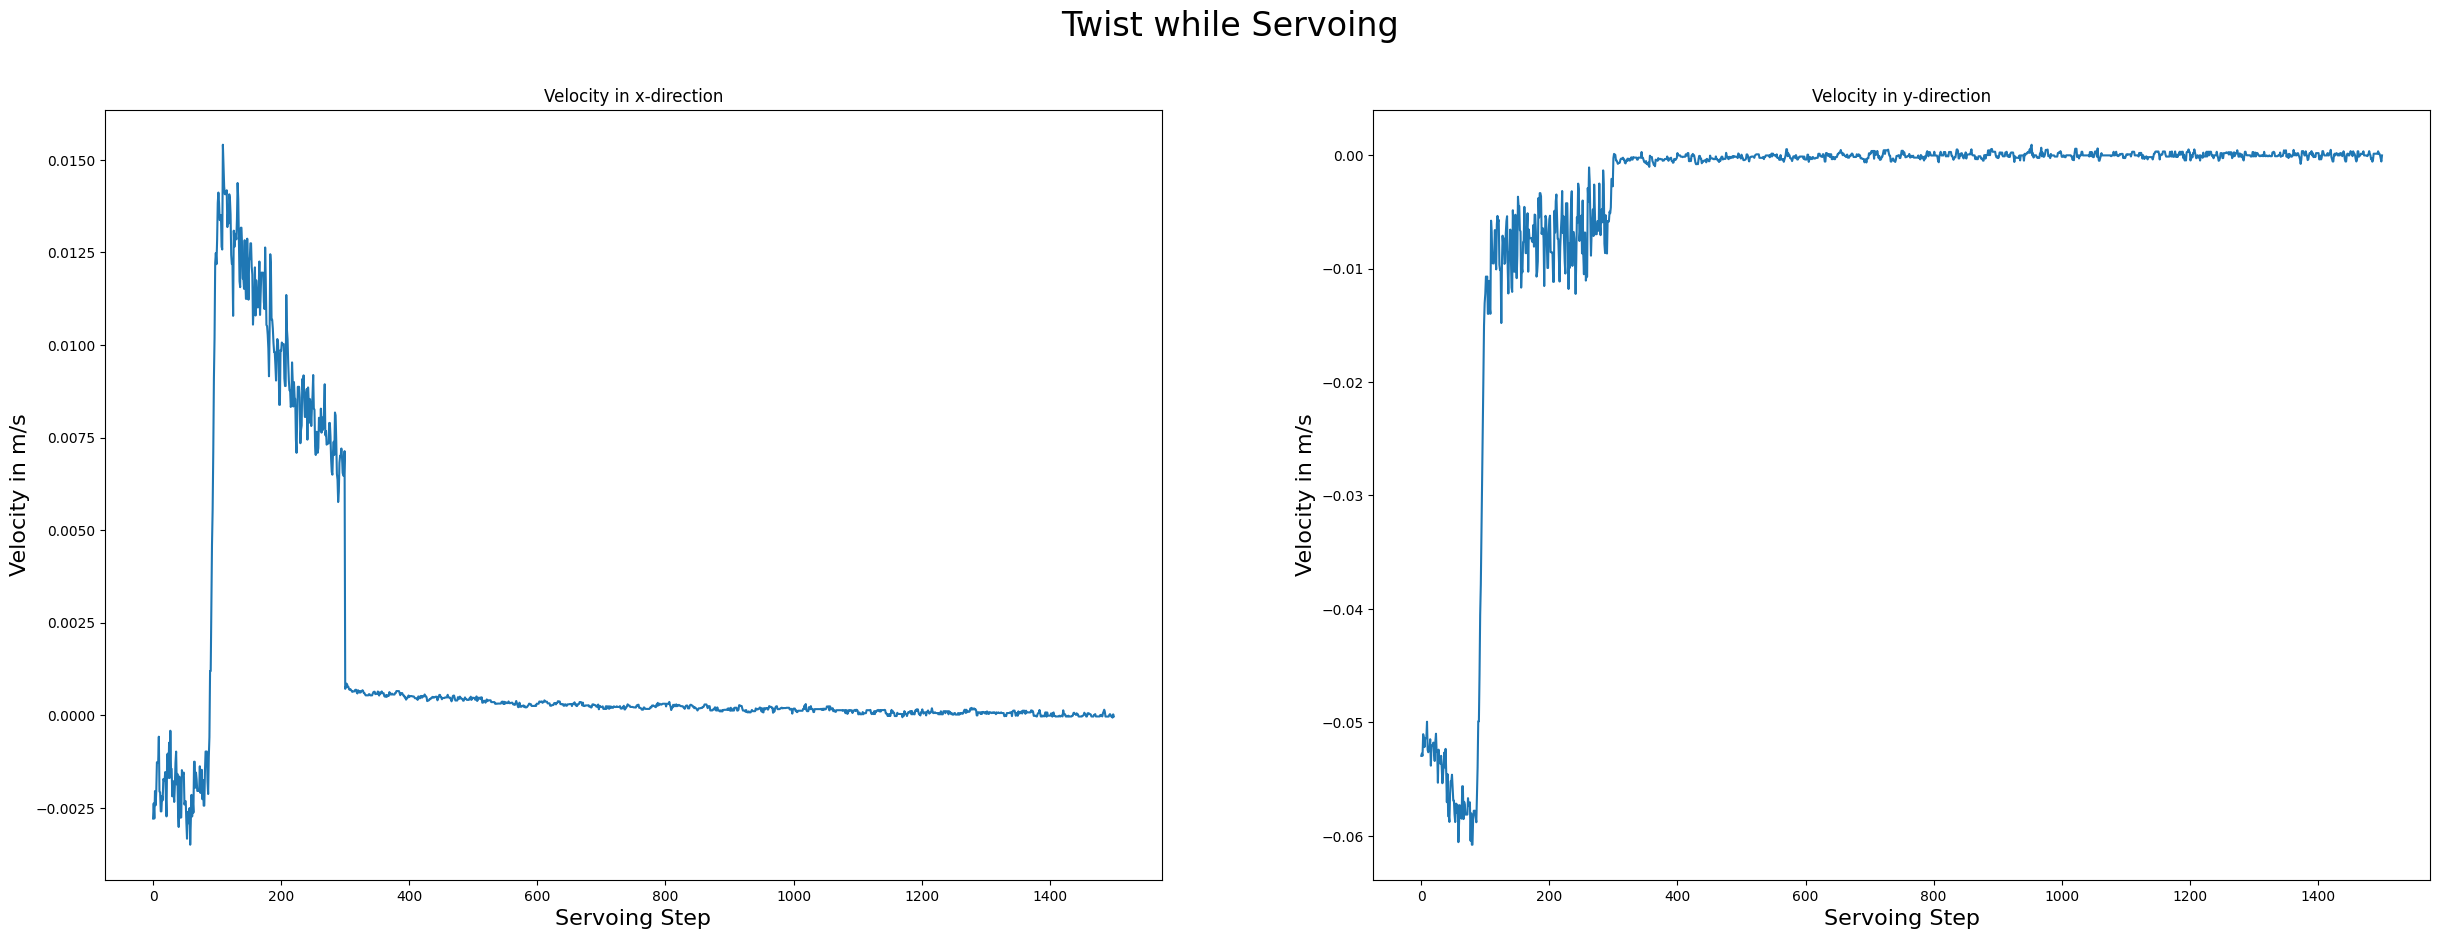

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10))

ax1.plot(velocity[0])
ax1.set_title("Velocity in x-direction")
ax1.set_xlabel("Servoing Step", fontsize=16)
ax1.set_ylabel("Velocity in m/s", fontsize=16)


ax2.plot(velocity[1])
ax2.set_title("Velocity in y-direction")
ax2.set_xlabel("Servoing Step", fontsize=16)
ax2.set_ylabel("Velocity in m/s", fontsize=16)

plt.suptitle('Twist while Servoing', fontsize=24)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


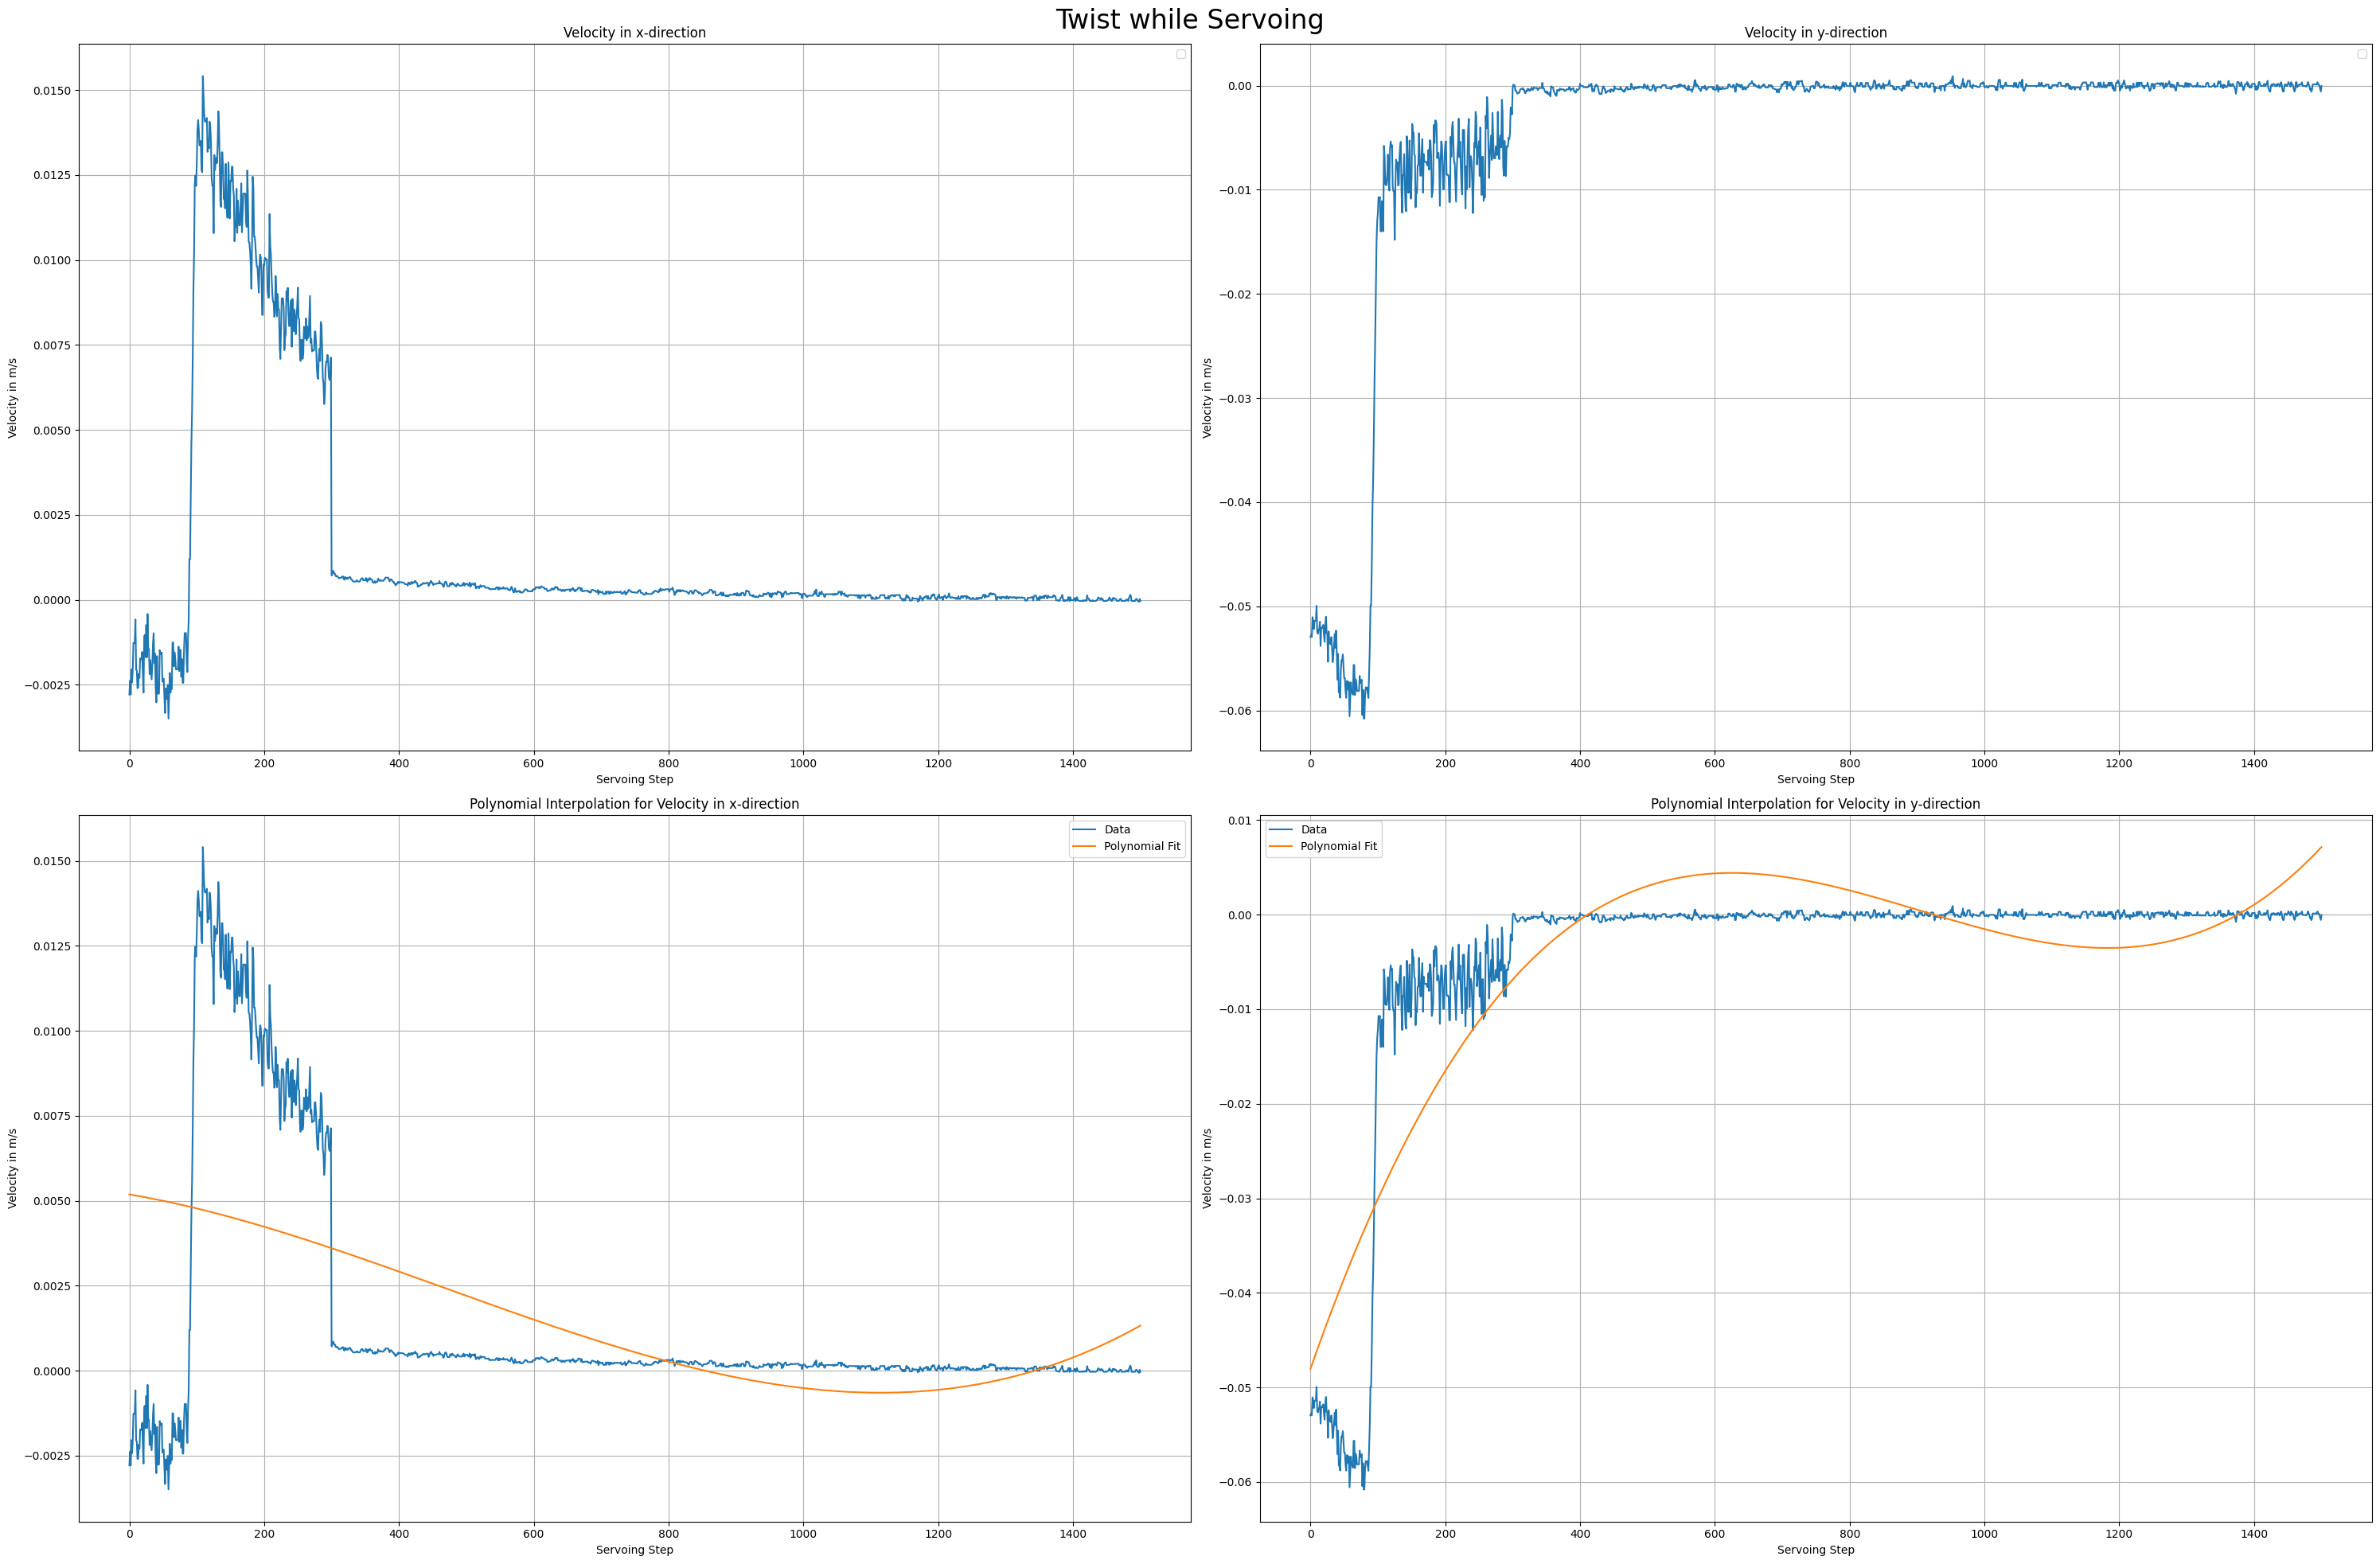

In [13]:
import numpy as np
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(30, 20))
ax1[0].plot(velocity[0])
ax1[0].set_title("Velocity in x-direction")
ax1[0].set_xlabel("Servoing Step")
ax1[0].set_ylabel("Velocity in m/s")
ax1[0].legend()
ax1[0].grid()  

# Plot 2: Velocity in y-direction
ax1[1].plot(velocity[1])
ax1[1].set_title("Velocity in y-direction")
ax1[1].set_xlabel("Servoing Step")
ax1[1].set_ylabel("Velocity in m/s")
ax1[1].legend()
ax1[1].grid()

# Plot 3: Polynomial interpolation for Velocity in x-direction
x = np.arange(len(velocity[0]))
fit_coeffs_x = np.polyfit(x, velocity[0], deg=3)  # Adjust degree as needed
fit_x = np.polyval(fit_coeffs_x, x)
ax2[0].plot(x, velocity[0], label="Data")
ax2[0].plot(x, fit_x, label="Polynomial Fit")
ax2[0].set_title("Polynomial Interpolation for Velocity in x-direction")
ax2[0].set_xlabel("Servoing Step")
ax2[0].set_ylabel("Velocity in m/s")
ax2[0].legend()
ax2[0].grid()

# Plot 4: Polynomial interpolation for Velocity in y-direction
fit_coeffs_y = np.polyfit(x, velocity[1], deg=3)  # Adjust degree as needed
fit_y = np.polyval(fit_coeffs_y, x)
ax2[1].plot(x, velocity[1], label="Data")
ax2[1].plot(x, fit_y, label="Polynomial Fit")
ax2[1].set_title("Polynomial Interpolation for Velocity in y-direction")
ax2[1].set_xlabel("Servoing Step")
ax2[1].set_ylabel("Velocity in m/s")
ax2[1].legend()
ax2[1].grid()

plt.suptitle('Twist while Servoing', fontsize=24)
plt.tight_layout()
plt.show()



# Linarty of Key Points over time


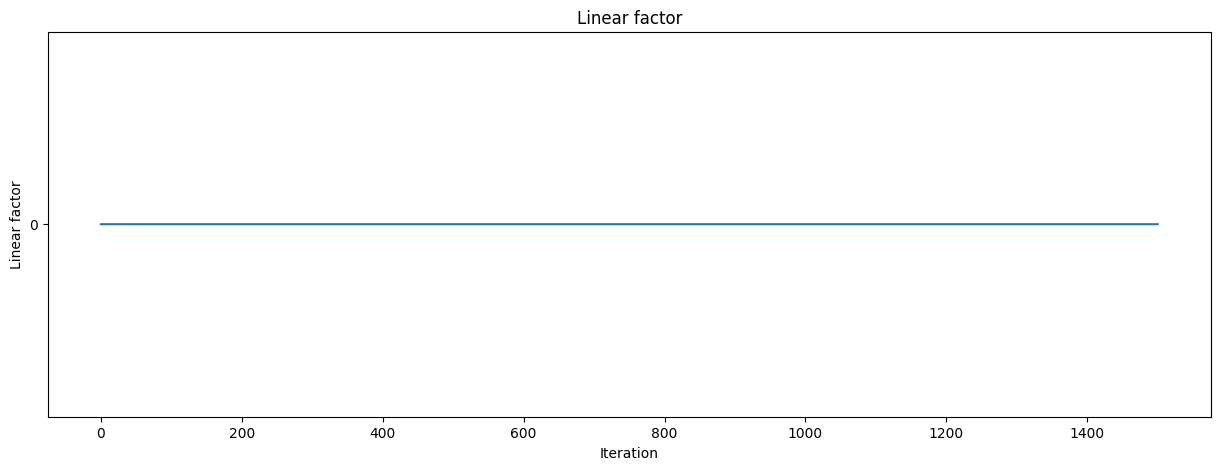

In [14]:
# We want to analyse the servoing informations[6]
lin_factor = []
for i in range(len(servoing_informations)):
    lin_factor.append(servoing_informations[i][7])

# Plot the linear factor
plt.figure(figsize=(15, 5))
plt.plot(lin_factor)
plt.title('Linear factor')
plt.xlabel('Iteration')
plt.ylabel('Linear factor')
plt.show()
    

# Zielbild und Enpose Visueller Vergleich

In [15]:
import cv2
import numpy as np
from PIL import ImageOps

## Pixcelerror between the goal Feature Points and the end feature Points

In [30]:
print(goal_featurepoints)
print(servoing_informations[-1][0])
goal_featurepoints = np.array(goal_featurepoints, dtype=np.int64)
end_featurepoints = eval(servoing_informations[-1][0])
print(end_featurepoints)

[[177 207]
 [236 210]
 [196 214]
 [216 215]
 [206 215]
 [218 205]
 [181 215]
 [241 204]]
[[176, 210], [234, 212], [194, 217], [214, 218], [204, 218], [216, 208], [180, 218], [240, 207]]
[[176, 210], [234, 212], [194, 217], [214, 218], [204, 218], [216, 208], [180, 218], [240, 207]]


In [29]:
import numpy as np

# goal_featurepoints = [[177, 215], [236, 210], [196, 214], [216, 215], [206, 215], [218, 205], [181, 215], [241, 204]]
# servoing_information = [[176, 210], [234, 212], [194, 217], [214, 218], [204, 218], [216, 208], [180, 218], [240, 207]]

# Berechnung der Differenzen zwischen den Koordinaten in x- und y-Richtung
differences = np.array(goal_featurepoints) - np.array(end_featurepoints)

# Durchschnittliche Pixelfehler in x- und y-Richtung
average_pixel_error = np.mean(abs(differences), axis=0)

print("Durchschnittlicher Pixelfehler in x-Richtung:", average_pixel_error[0])
print("Durchschnittlicher Pixelfehler in y-Richtung:", average_pixel_error[1])


Durchschnittlicher Pixelfehler in x-Richtung: 1.625
Durchschnittlicher Pixelfehler in y-Richtung: 2.875


In [31]:
pixel_in_mm = 1.12 # wieviel enspricht ein Pixel in mm bei Kameraeinstellung im Mittel 870 pixel pro Meter

print("Durchschnittlicher Pixelfehler in x-Richtung:", average_pixel_error[0]*pixel_in_mm)
print("Durchschnittlicher Pixelfehler in y-Richtung:", average_pixel_error[1]*pixel_in_mm) 

Durchschnittlicher Pixelfehler in x-Richtung: 1.8200000000000003
Durchschnittlicher Pixelfehler in y-Richtung: 3.22


## Vizualation of the End and Goal Feature Points in the goal Image

In [32]:
from PIL import Image, ImageOps

def img_patch(img, im_size):
    # Calculate the aspect ratio of the image
    img_ratio = img.width / img.height

    # If the image is wider than it is high
    if img_ratio > 1:
        # Scale the width to the desired size and calculate the height while maintaining the aspect ratio
        new_width = im_size[0]
        new_height = int(new_width / img_ratio)
    # If the image is taller than it is wide
    else:
        # Scale the height to the desired size and calculate the width while maintaining the aspect ratio
        new_height = im_size[1]
        new_width = int(new_height * img_ratio)

    # Resize the image to the calculated size while maintaining the aspect ratio
    img = img.resize((new_width, new_height), resample=Image.BICUBIC)

    # Add black borders to the left and right or top and bottom of the image to make it the desired size
    delta_w = im_size[0] - new_width
    delta_h = im_size[1] - new_height
    pad_width = delta_w // 2
    pad_height = delta_h // 2
    padding = (pad_width, pad_height, delta_w - pad_width, delta_h - pad_height)
    
    img = ImageOps.expand(img, border=padding, fill=(255,255,255))

    # Return the scaled and centered image
    return img



In [33]:
from PIL import Image

# Load the image
img = Image.open('/home/svenportable/FuE/F-E-Project_Part_2/servoing_csv/goal_pic/goal_picture.png')

# Define the desired size
desired_size = (720, 720)

# Call the img_patch function
patched_img = img_patch(img, desired_size)


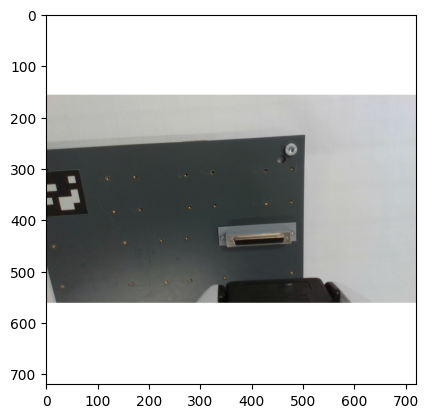

In [34]:
import matplotlib.pyplot as plt

plt.imshow(patched_img)
plt.show()


In [ ]:
# Add the Keypoints of the Goal Image
# Convert the PIL Image to a numpy array (and convert RGB to BGR for use with cv2)
patched_img = cv2.cvtColor(np.array(patched_img), cv2.COLOR_RGB2BGR)

scaled_featurepoints = []
for point in goal_featurepoints:
    # Multipliziere jeden Punkt mit dem Faktor 2
    scaled_point = [coordinate * 2 for coordinate in point]
    scaled_featurepoints.append(scaled_point)

    # Färbe den Pixel rot
    patched_img[scaled_point[1], scaled_point[0]] = [0, 0, 255]  # BGR color

# Add the Keypoints of the end Image

# Save the edited image
cv2.imwrite('/home/svenportable/FuE/F-E-Project_Part_2/servoing_csv/validation_picture/validation_picture.png', patched_img)


In [37]:
# Add the Keypoints of the Goal Image
# Convert the PIL Image to a numpy array (and convert RGB to BGR for use with cv2)
patched_img = cv2.cvtColor(np.array(patched_img), cv2.COLOR_RGB2BGR)

scaled_featurepoints = []
for point in goal_featurepoints:
    # Multipliziere jeden Punkt mit dem Faktor 2
    scaled_point = [coordinate * 2 for coordinate in point]
    scaled_featurepoints.append(scaled_point)

    # Färbe den Pixel rot
    patched_img[scaled_point[1], scaled_point[0]] = [0, 0, 255]  # BGR color

# Add the Keypoints of the end Image
# Coloring for servoing_information points in blue
scaled_featurepoints = []
for point in end_featurepoints:
    # Multipliziere jeden Punkt mit dem Faktor 2
    scaled_point = [coordinate * 2 for coordinate in point]
    scaled_featurepoints.append(scaled_point)
    #Färbe den Pixel
    patched_img[scaled_point[1], scaled_point[0]] = [255, 0, 0]  # Blue
# Save the edited image
cv2.imwrite('/home/svenportable/FuE/F-E-Project_Part_2/servoing_csv/validation_picture/validation_picture.png', patched_img)


True

# 